# 4.6 Lab: Exercises

The following notebook contains exercises 11, 12, 13 for the 'Classification' chapter (chapter 4) of ISLR book.

## Questions for professor

* In the lab they split the data into test and train differently, in the exercises, I used 70 to 30 %

## Question 11

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

In [105]:
library(MASS)
library(ISLR)
set.seed(33558)

# load auto dataset
attach(Auto)

# let's remind ourselves description of the dataset
?Auto

The following objects are masked from Auto (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The following objects are masked from Auto (pos = 6):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    name, origin, weight, year

The following objects are masked from Auto (pos = 10):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year



Auto {ISLR},R Documentation


### Step (a)

>  Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [106]:
Auto$mpg01 <- ifelse(mpg > median(Auto$mpg), 1, 0)

# check results
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


### Step (b)

> Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

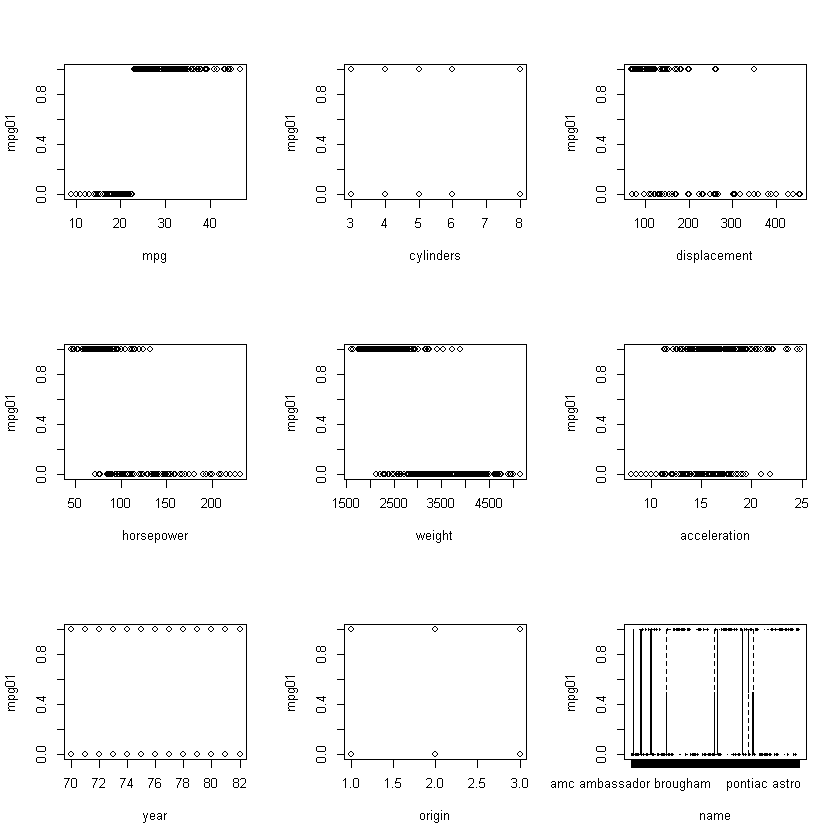

In [107]:
par(mfrow=c(3,3))
plot(mpg01~., data=Auto)

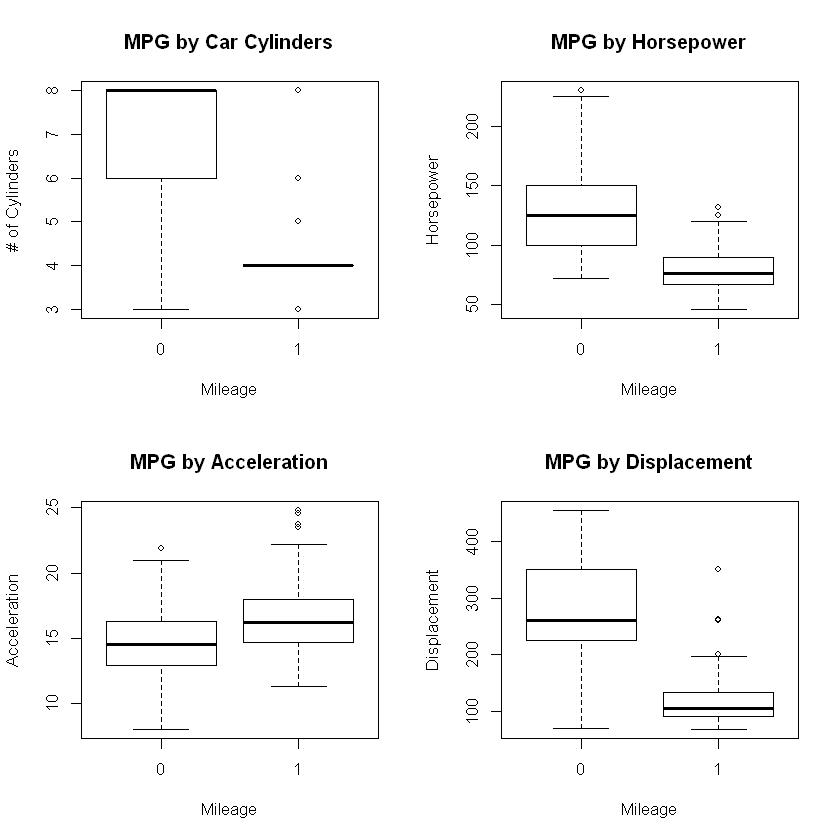

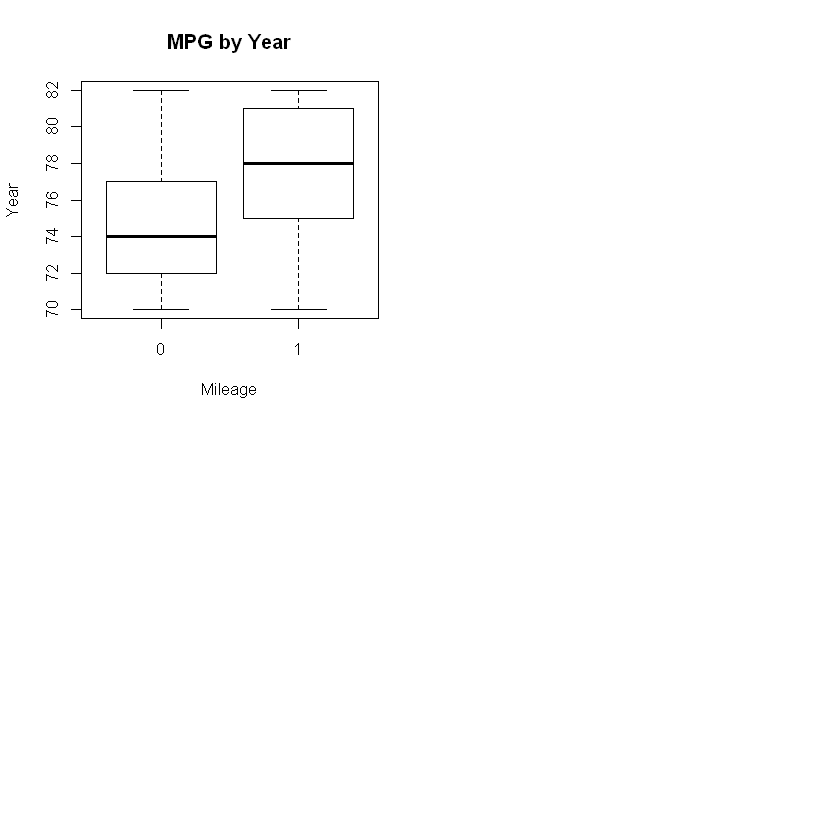

In [108]:
par(mfrow=c(2,2))
boxplot(cylinders~mpg01, data=Auto, main="MPG by Car Cylinders", xlab="Mileage", ylab="# of Cylinders")
boxplot(horsepower~mpg01, data=Auto, main="MPG by Horsepower", xlab="Mileage", ylab="Horsepower")
boxplot(acceleration~mpg01, data=Auto, main="MPG by Acceleration", xlab="Mileage", ylab="Acceleration")
boxplot(displacement~mpg01, data=Auto, main="MPG by Displacement", xlab="Mileage", ylab="Displacement")
boxplot(year~mpg01, data=Auto, main="MPG by Year", xlab="Mileage", ylab="Year")

Based on the above visuals, we can observe that 

* horsepower
* weight
* acceleration
* displacement
* year

seem to have a certain pattern in relation to `mpg01`. `mpg` is naturally associated simply because we calculated `mpg01` based on `mpg`.

### Step (c)

> Split the data into a training set and a test set.

In [109]:
# use sample to create train and test set with a vector based on probabilities
train_index <- sample(c(FALSE, TRUE), nrow(Auto), replace = TRUE, prob = c(0.3, 0.7))
train <- Auto[train_index,]
test <- Auto[!train_index,]

The above vector contains the True, False to be used as a mask when filtering the main dataset.

### Step (d)

> Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [110]:
lda.fit = lda(mpg01~horsepower+weight+acceleration+displacement+year, data = train)
lda.fit

Call:
lda(mpg01 ~ horsepower + weight + acceleration + displacement + 
    year, data = train)

Prior probabilities of groups:
        0         1 
0.4843206 0.5156794 

Group means:
  horsepower   weight acceleration displacement     year
0  127.20863 3589.050     14.84101     267.3022 74.53237
1   78.54054 2325.514     16.46351     114.5878 77.72973

Coefficients of linear discriminants:
                      LD1
horsepower    0.011954851
weight       -0.001102936
acceleration -0.012829832
displacement -0.009161267
year          0.126856800

In [111]:
# make predictions using the fitted model
lda.pred = predict(lda.fit, test[,c('horsepower', 'weight', 'acceleration',
                                    'displacement', 'year', 'mpg01')])
names(lda.pred)

[1] "class"     "posterior" "x"

In [112]:
# generate a confusion matrix
lda.class <- lda.pred$class # predicted values
test.mpg01 <- test$mpg01 # test set target values
table(lda.class, test.mpg01)

         test.mpg01
lda.class  0  1
        0 49  3
        1  8 45

In [113]:
# Accuracy
lda_acc <- round(mean(lda.class==test.mpg01), 3)

paste("LDA Model Accuracy is", round(lda_acc, 3))
paste("LDA Model Test Error Rate is", round(1-lda_acc, 3))

[1] "LDA Model Accuracy is 0.895"

[1] "LDA Model Test Error Rate is 0.105"

We can observe that our model's test accuracy is 89% which means that our test error rate is 11%.

### Step (d)

> Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [114]:
qda.fit = qda(mpg01~horsepower+weight+acceleration+displacement+year, data=train)
qda.fit

Call:
qda(mpg01 ~ horsepower + weight + acceleration + displacement + 
    year, data = train)

Prior probabilities of groups:
        0         1 
0.4843206 0.5156794 

Group means:
  horsepower   weight acceleration displacement     year
0  127.20863 3589.050     14.84101     267.3022 74.53237
1   78.54054 2325.514     16.46351     114.5878 77.72973

In [115]:
# make predictions using the fitted model
qda.pred = predict(qda.fit, test[,c('horsepower', 'weight', 'acceleration',
                                    'displacement', 'year', 'mpg01')])
names(qda.pred)

[1] "class"     "posterior"

In [116]:
# generate a confusion matrix
qda.class <- qda.pred$class # predicted values
test.mpg01 <- test$mpg01 # test set target values
table(qda.class, test.mpg01)

         test.mpg01
qda.class  0  1
        0 51  6
        1  6 42

In [117]:
# Accuracy
qda_acc <- round(mean(qda.class==test.mpg01), 3)

paste("QDA Model Accuracy is", round(qda_acc, 3))
paste("QDA Model Test Error Rate is", round(1-qda_acc, 3))

[1] "QDA Model Accuracy is 0.886"

[1] "QDA Model Test Error Rate is 0.114"

### Step (f)

>  Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [118]:
# fit the model
glm.fit = glm(mpg01~horsepower+weight+acceleration+displacement+year,
              data=train, family=binomial)
summary(glm.fit)


Call:
glm(formula = mpg01 ~ horsepower + weight + acceleration + displacement + 
    year, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1454  -0.0867   0.0302   0.2202   3.7071  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -13.870310   6.656823  -2.084  0.03719 *  
horsepower    -0.055797   0.028391  -1.965  0.04938 *  
weight        -0.003385   0.001244  -2.722  0.00649 ** 
acceleration  -0.111226   0.169987  -0.654  0.51290    
displacement  -0.013155   0.007945  -1.656  0.09779 .  
year           0.426787   0.084940   5.025 5.05e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 397.58  on 286  degrees of freedom
Residual deviance: 111.71  on 281  degrees of freedom
AIC: 123.71

Number of Fisher Scoring iterations: 8


In [119]:
# make predictions
glm.probs=predict(glm.fit, test, type="response")

In [120]:
# identify class based on threshhold
glm.pred=rep(0,nrow(test))
glm.pred[glm.probs >.5]=1

In [121]:
# accuracy and test error
glm_acc <- round(mean(glm.pred==test.mpg01), 3)

paste("Logistic Model Accuracy is", round(glm_acc, 3))
paste("Logistic Model Test Error Rate is", round(1-glm_acc, 3))

[1] "Logistic Model Accuracy is 0.876"

[1] "Logistic Model Test Error Rate is 0.124"

### Step (g)

> Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

We will iterate through multiple values of k.

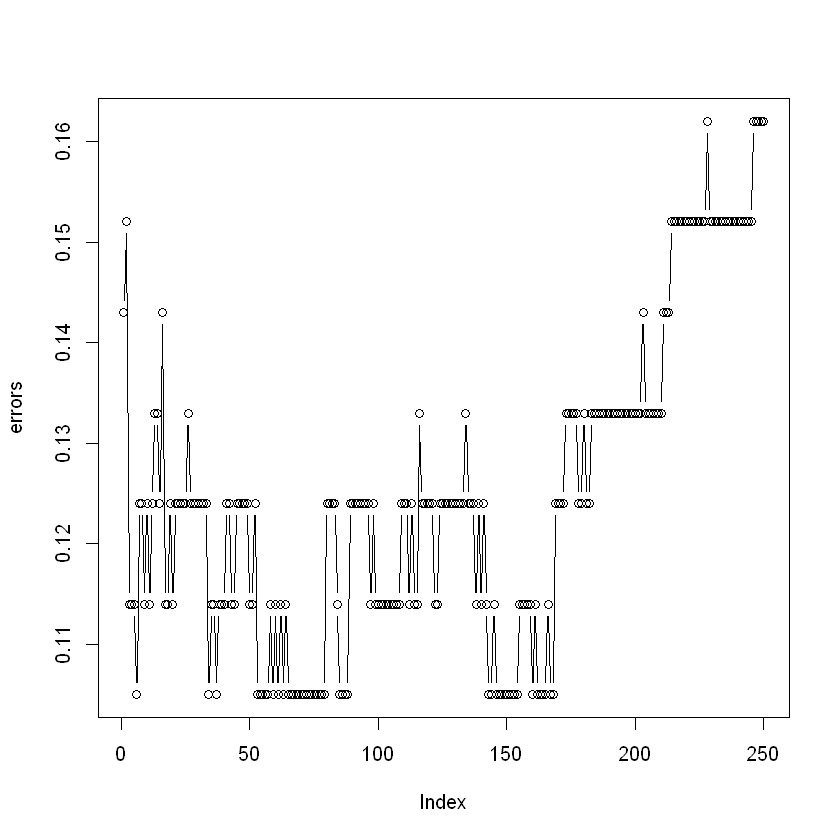

In [142]:
library(class)
# list of features we will use
features <- c('horsepower', 'weight', 'acceleration','displacement', 'year')

# empty list for errors
errors <- rep(0, 250)

# iterate through
for (j in 1:250) {
    knn.pred <- knn(train[,features], test[, features], train$mpg01, k=j)
    error <- 1 - round(mean(knn.pred==test.mpg01), 3)
    errors[j] <- error
}

# plot errors
plot(errors, type="b")

In [143]:
min(errors)

[1] 0.105

We can observe that there are multiple values for K that produce the lowest error.

## Qestion 12

This problem involves writing functions.

### Step (a)

> Write a function, `Power()` , that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 2 3 and print out the results. Hint: Recall that `x^a` raises `x` to the power `a`. Use the `print()` function to output the result.

In [126]:
power <- function() {
    print(2^3)
}
power()

[1] 8


### Step (b)

> Create a new function, `Power2()`, that allows you to pass any two numbers, `x` and `a`, and prints out the value of `x^a`. You can do this by beginning your function with the line 
> `Power2=function (x,a) `{You should be able to call your function by entering, for instance,
> `Power2(3,8)` on the command line. This should output the value of $3^8$, namely, 6,561.

In [127]:
power2 <- function(base, pwr) {
    print(base^pwr)
}

### Step (c)

> Using the `Power2()` function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.

In [128]:
power2(10, 3)
power2(8, 17)
power2(131, 3)

[1] 1000
[1] 2.2518e+15
[1] 2248091


### Step (d)

>  Now create a new function, `Power3()`, that actually returns the result `x^a` as an `R` object, rather than simply printing it to the screen. That is, if you store the value `x^a` in an object called result within your function, then you can simply `return()` this result, using the following line: return(result). The line above should be the last line in your function, before
the `}` symbol.

In [129]:
power3 <- function(base, pwr) {
    return(base^pwr)
}

### Step (e)

> Now using the `Power3()` function, create a plot of $f(x)=x^2$.The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$. Label the axes  appropriately, and use an appropriate title for the figure. Consider displaying either
the x-axis, the y-axis, or both on the log-scale. You can do this by using `log=‘‘x’’`, `log=‘‘y’’`, or `log=‘‘xy’’` as arguments to the `plot()` function.

In [130]:
x <- seq(1, 10, by=0.25)
fx <- power3(x, 2)

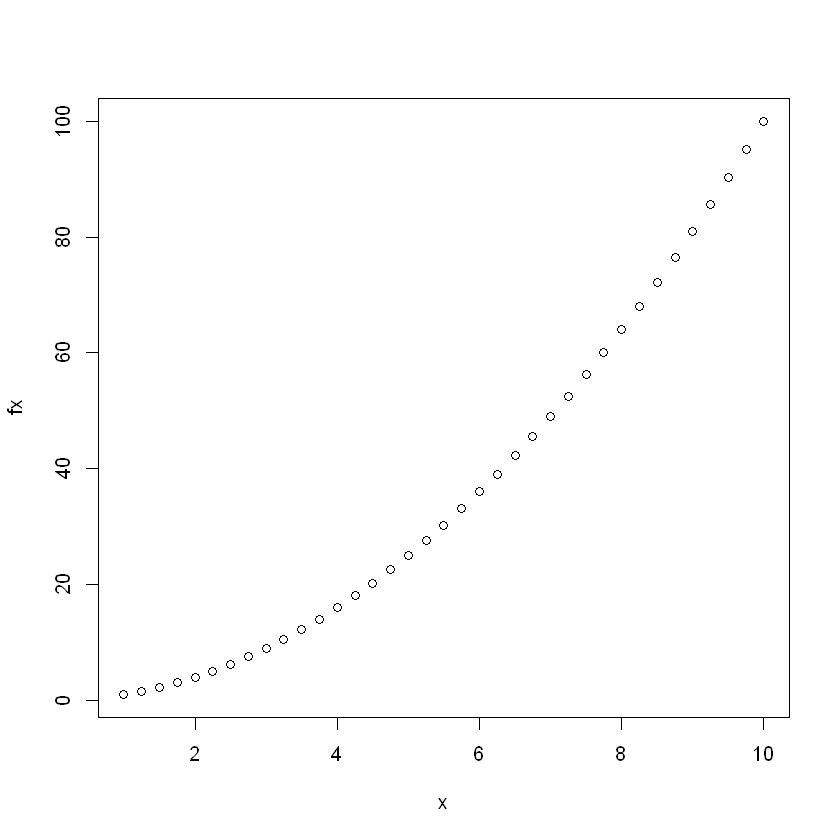

In [131]:
plot(x, fx)

### Step (f)

> Create a function, `PlotPower()`, that allows you to create a plot of `x` against $x^a$ for a fixed a and for a range of values of `x`. For instance, if you call `PlotPower(1:10,3)` then a plot should be created with an x-axis taking on values $1,2,...,10$, and a y-axis taking on values $1^3, 2^3 ,...,10^3$.

In [132]:
PlotPower <- function(range, power) {
    y <- range^power
    plot(range, y)
}

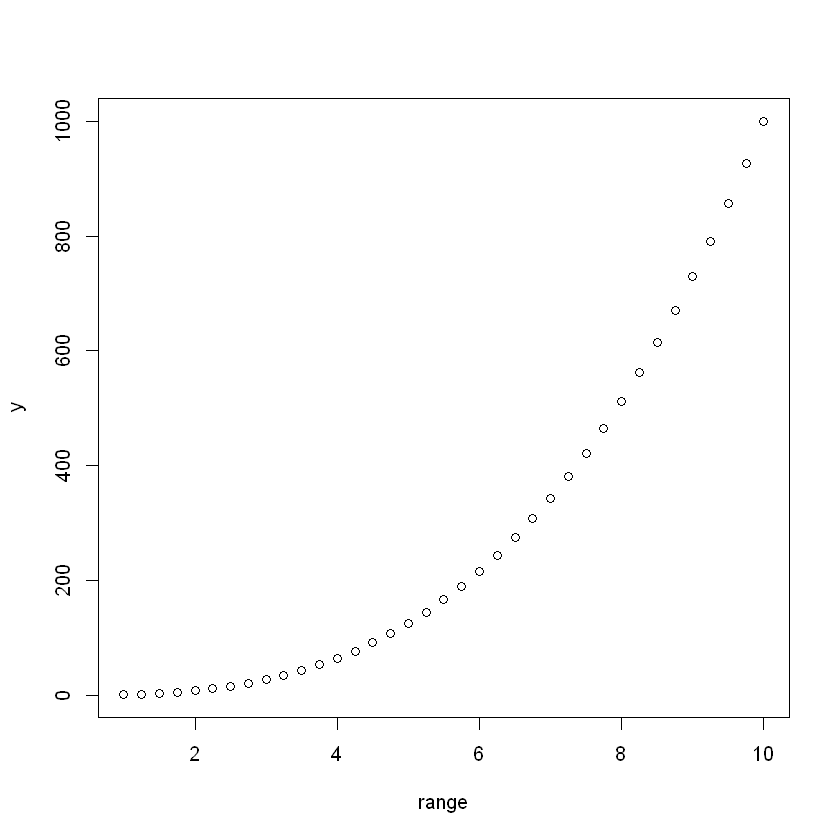

In [133]:
PlotPower(seq(1, 10, 0.25), 3)

## Question 13

> Using the `Boston` data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

First we will explore our dataset a bit to get a better understanding of it as well as shortly identify the features that might be the best predictors.

In [134]:
attach(Boston)
?Boston

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, crimclass, dis, indus, lstat, medv, nox,
    ptratio, rad, rm, tax, zn

The following objects are masked from Boston (pos = 6):

    age, black, chas, crim, crimclass, dis, indus, lstat, medv, nox,
    ptratio, rad, rm, tax, zn

The following objects are masked from Boston (pos = 9):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn



Boston {MASS},R Documentation


First, let's create a feature indicating whether a crime rate for a suburb is above (1) or below (0) the median.

In [135]:
# create crim class and check the dataframe
Boston$crimclass <- ifelse(crim > median(Boston$crim), 1, 0)
nrow(Boston[Boston$crimclass==0,])
nrow(Boston[Boston$crimclass==1,])
nrow(Boston)

[1] 253

[1] 253

[1] 506

We can observe that we have a very balanced dataset, where half of the observations are above the median and the other half is below.

Next, let's visualize the relationship of crimclass to other variables.

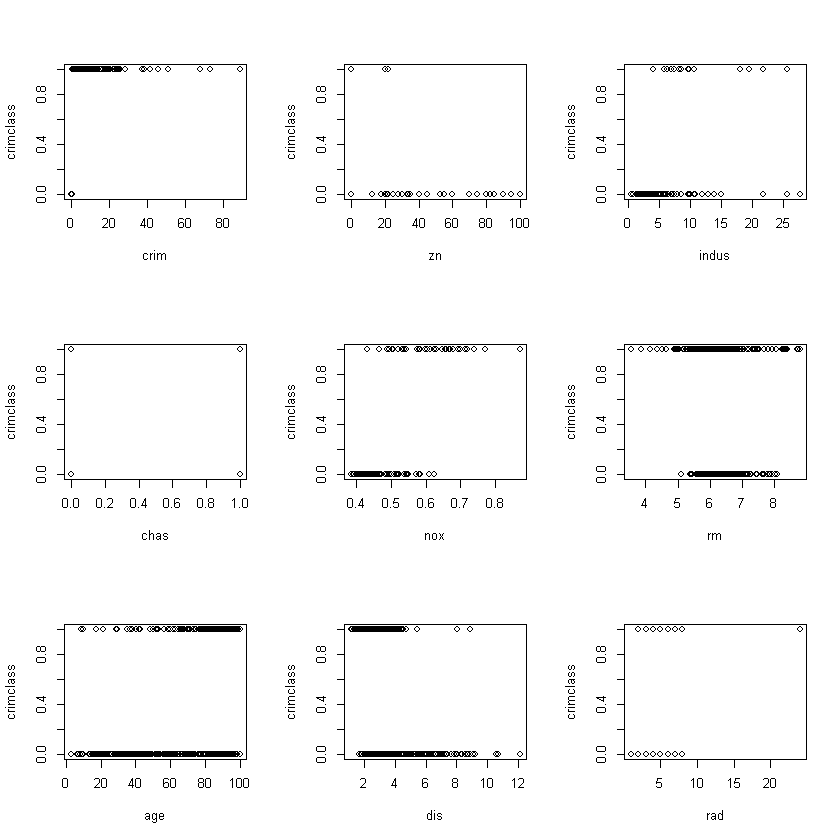

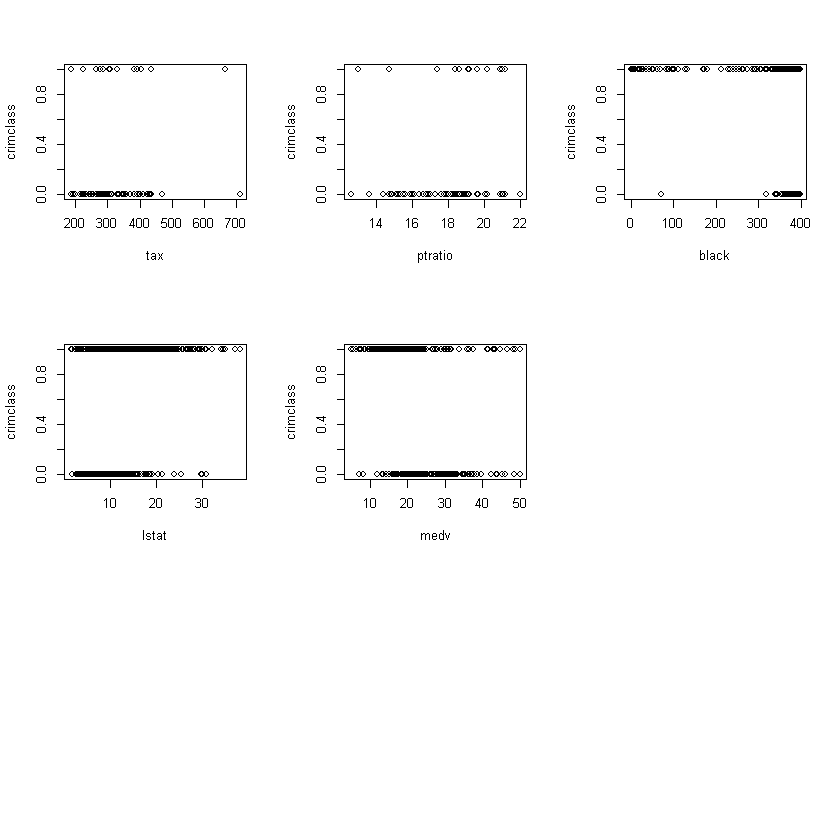

In [136]:
par(mfrow=c(3,3))
plot(crimclass~., data=Boston)

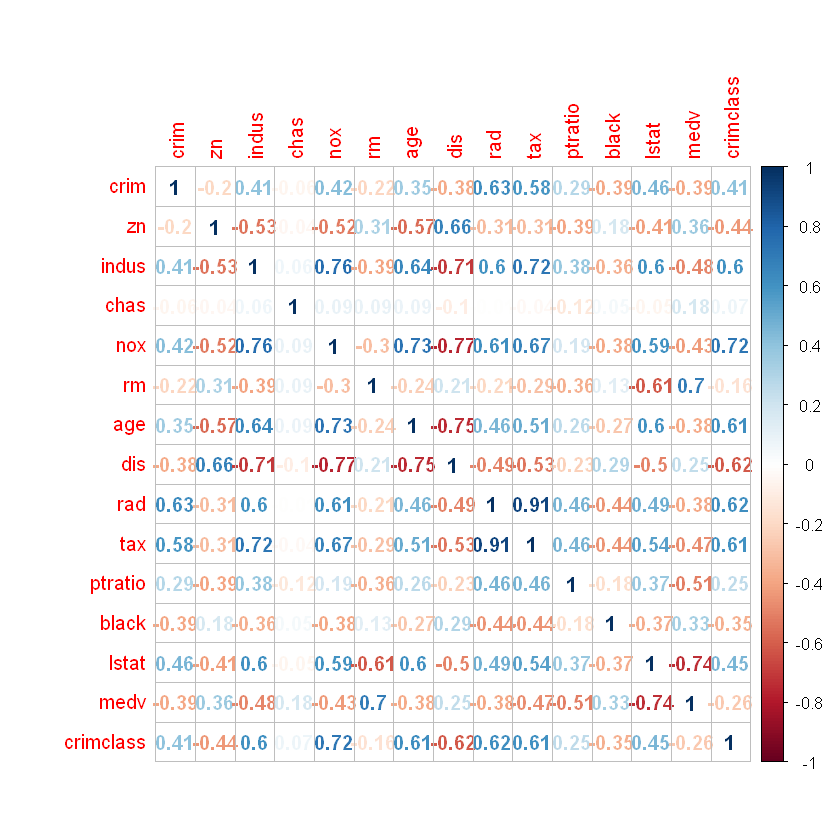

In [137]:
#install.packages("corrplot")
library(corrplot)
corrplot(cor(Boston), method = 'number')

From the above colored correlation plot, we can observe that the following variables have a correlation with crimclass which we will explore further

* `indus` - proportion of non-retail business acres per town.
* `nox` - nitrogen oxides concentration (parts per 10 million)
* `age` - proportion of owner-occupied units built prior to 1940
* `dis` - weighted mean of distances to five Boston employment centres.
* `rad` - index of accessibility to radial highways.
* `tax` - full-value property-tax rate per $10,000.

We will explore the relationship of crimclass with these variables further by plotting boxplots.

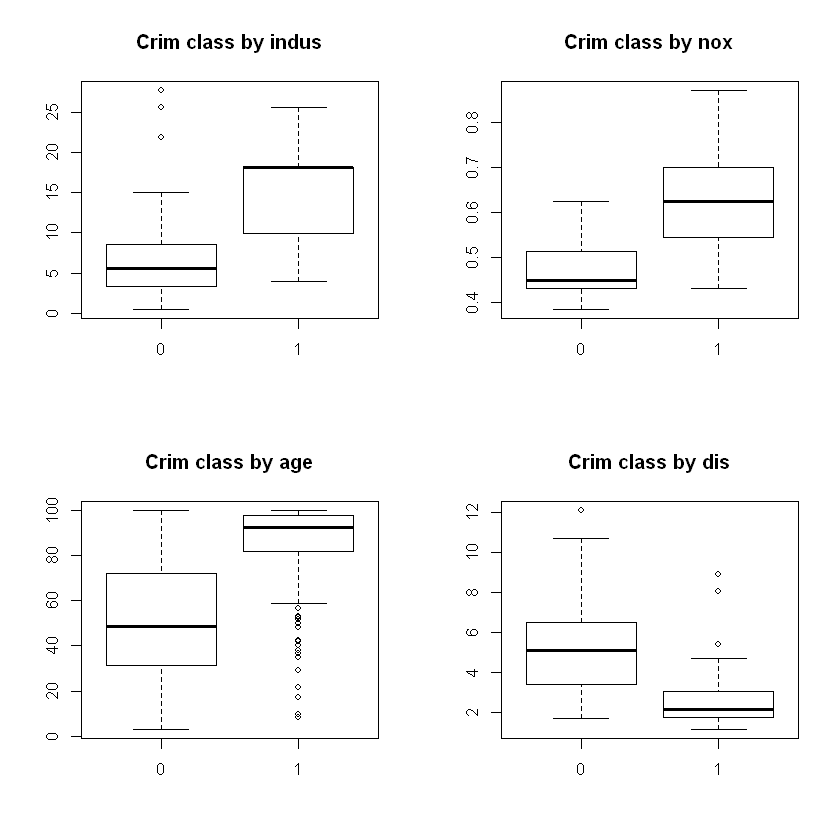

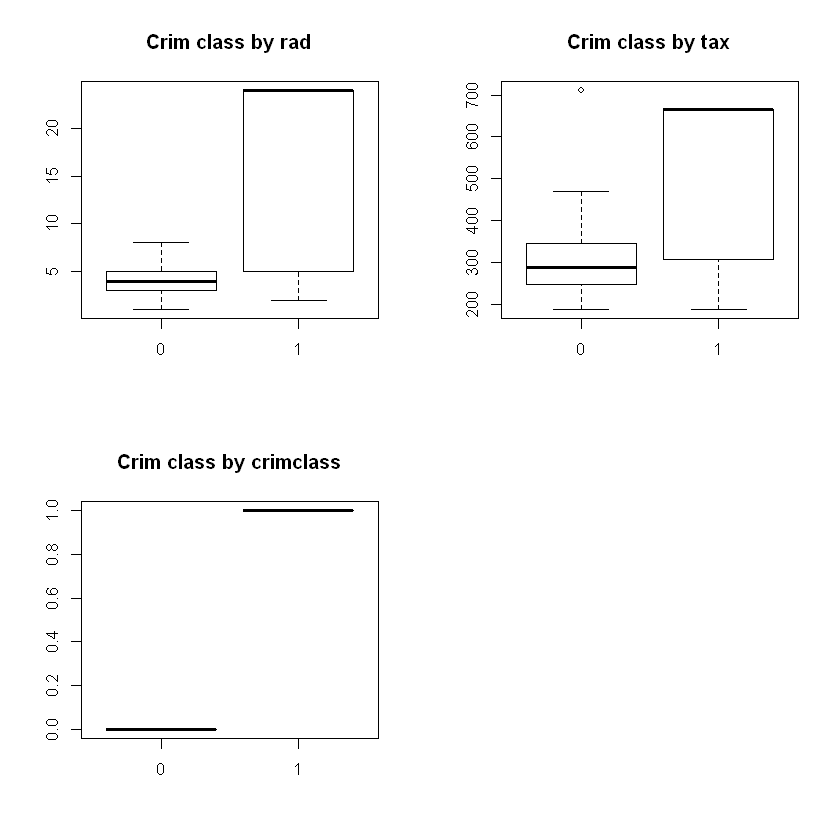

In [182]:
features = c('indus', 'nox', 'age', 'dis', 'rad', 'tax', 'crimclass')
par(mfrow=c(2,2))
for (feature in features) {
    boxplot(Boston[,feature]~Boston[,'crimclass'], main=paste("Crim class by", feature))
}

Next we will use the logistic regression model to also find out which predictors we chose.

In [139]:
features = c('indus', 'nox', 'age', 'dis', 'rad', 'tax', 'crimclass')
# subset our data
df <- Boston[,features]